In [1]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



# GAIT PROCESSING

fdsfsdfsdf


In [2]:
import os
import matplotlib.pyplot as plt

# pyCGM2 settings
import pyCGM2

# pyCGM2 libraries
from pyCGM2.Tools import btkTools
from pyCGM2.Report import plot,plotFilters,plotViewers,normativeDatasets
from pyCGM2.Processing import c3dManager,exporter,scores
from pyCGM2.Processing.highLevel import standardSmartFunctions,gaitSmartFunctions
from pyCGM2.Model.CGM2 import  cgm,cgm2
from pyCGM2.Utils import files


In [3]:
# DATA
DATA_PATH = "C:\\Users\\HLS501\\Documents\\VICON DATA\\pyCGM2-Data\\Datasets Tests\\didier\\08_02_18_Vincent Pere\\"
modelledFilenames = ["08_02_18_Vincent_Pere_Gait_000_MOKKA-modelled-cgm24.c3d"]
modelInfo = None
subjectInfo = None
experimentalInfo = None
modelVersion= "CGM2.4"
pointSuffix=""

In [4]:
c3dmanagerProcedure = c3dManager.UniqueC3dSetProcedure(DATA_PATH,modelledFilenames)
cmf = c3dManager.C3dManagerFilter(c3dmanagerProcedure)
cmf.enableEmg(False)
trialManager = cmf.generate()

In [5]:
analysis = gaitSmartFunctions.make_analysis(trialManager,
      None,
      None,
      modelInfo, subjectInfo, experimentalInfo,
      modelVersion = "CGM2.4",
      pointLabelSuffix=pointSuffix)

normativeDataset = normativeDatasets.Schwartz2008("Free")

gps =scores.CGM1_GPS(pointSuffix= pointSuffix)
scf = scores.ScoreFilter(gps,analysis, normativeDataset)
scf.compute()

## Spatio-temporal Parameters

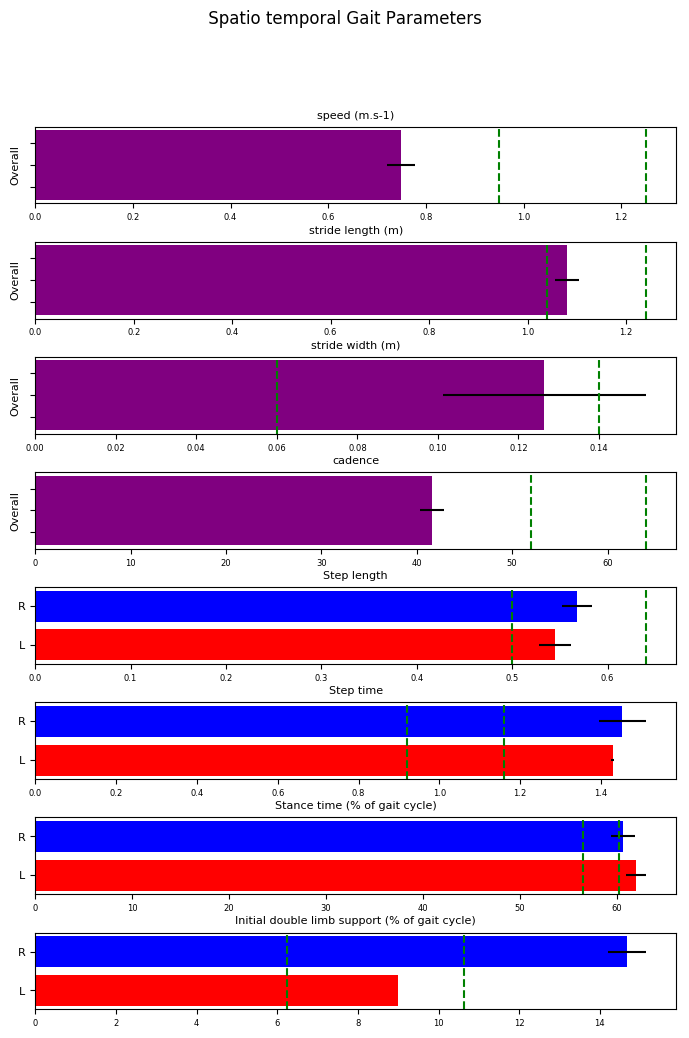

In [6]:
# filter 0 - stp panel
    #-------------------------------------------

stpv = plotViewers.SpatioTemporalPlotViewer(analysis)
stpv.setNormativeDataset(normativeDatasets.NormalSTP())

# filter
stppf = plotFilters.PlottingFilter()
stppf.setViewer(stpv)
stppf.plot()

plt.show()

## Mouvement Analysis Profile

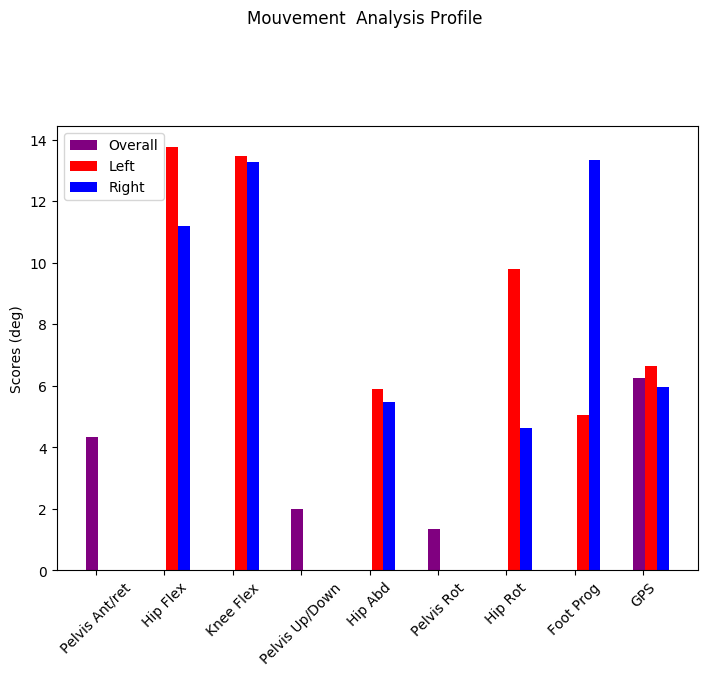

In [7]:
kv = plotViewers.GpsMapPlotViewer(analysis)
# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()

## Kinematic Traces

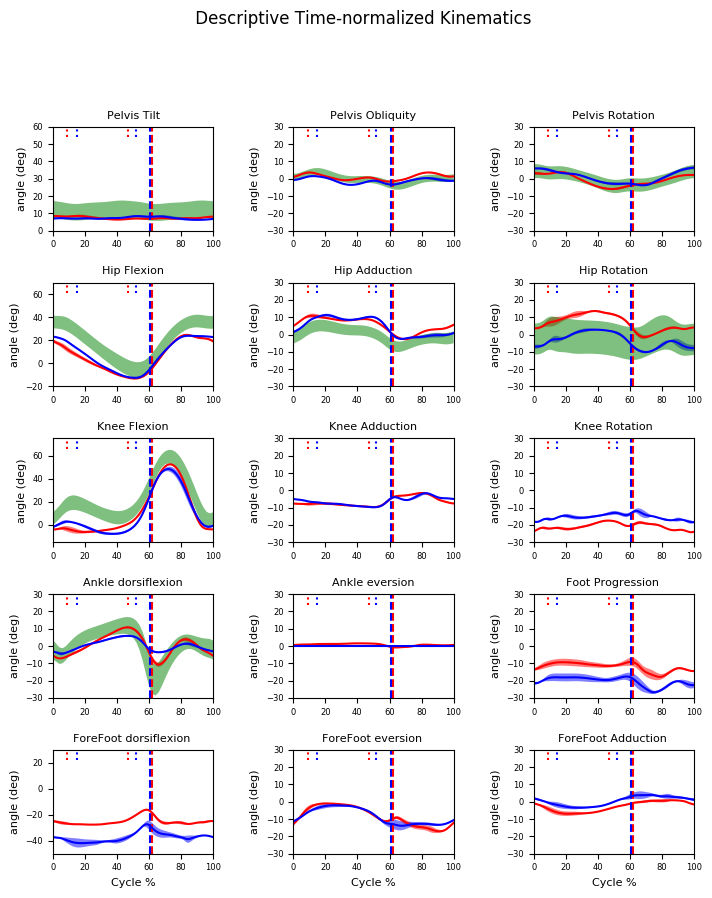

In [8]:
# filter 1 - descriptive kinematic panel
#-------------------------------------------
# viewer

kv = plotViewers.LowerLimbMultiFootKinematicsPlotViewer(analysis,
                    pointLabelSuffix=pointSuffix)

kv.setConcretePlotFunction(plot.gaitDescriptivePlot)
kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()

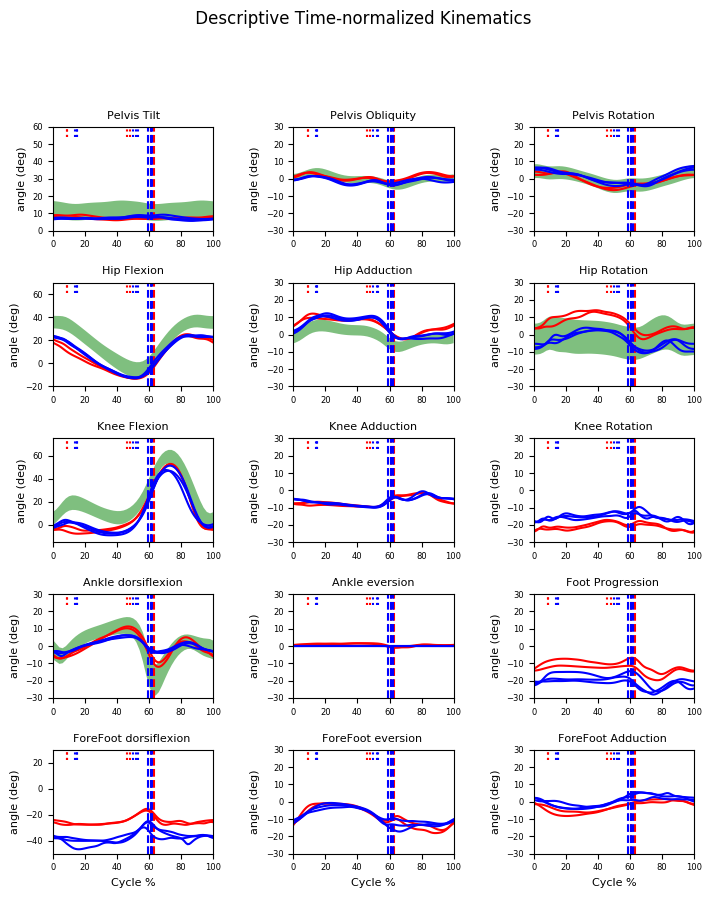

In [9]:
kv.setConcretePlotFunction(plot.gaitConsistencyPlot)
kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()


## Kinetic Traces

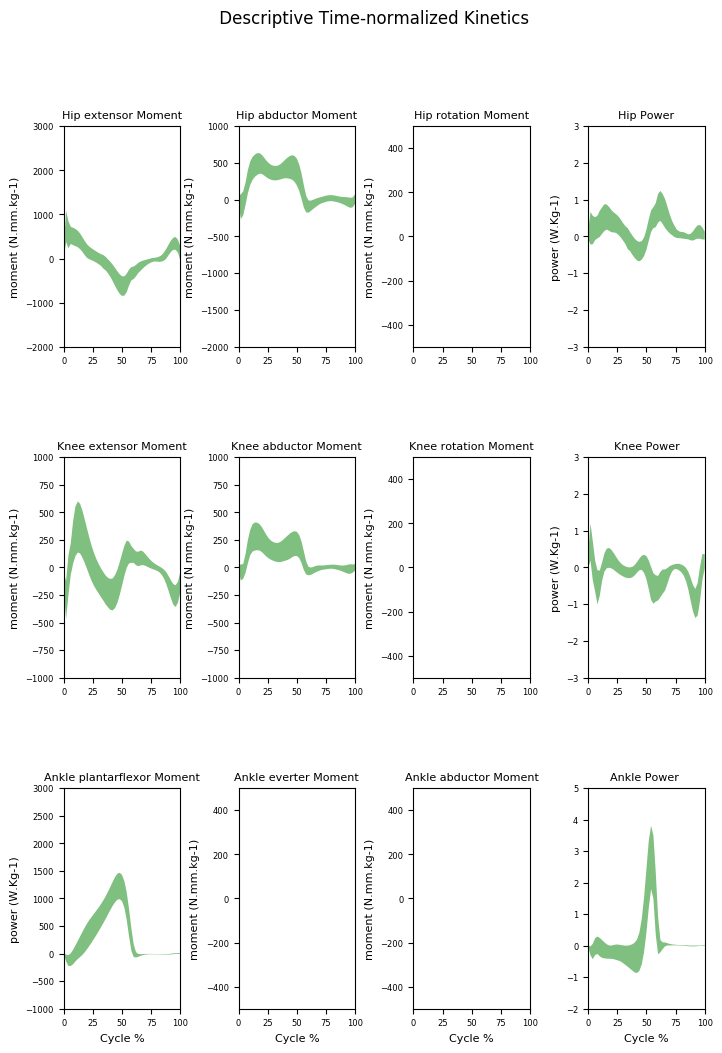

In [10]:
# filter 1 - descriptive kinetic panel
#-------------------------------------------
# viewer
kv = plotViewers.LowerLimbKineticsPlotViewer(analysis,pointLabelSuffix=pointSuffix)
kv.setConcretePlotFunction(plot.gaitDescriptivePlot)

kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()

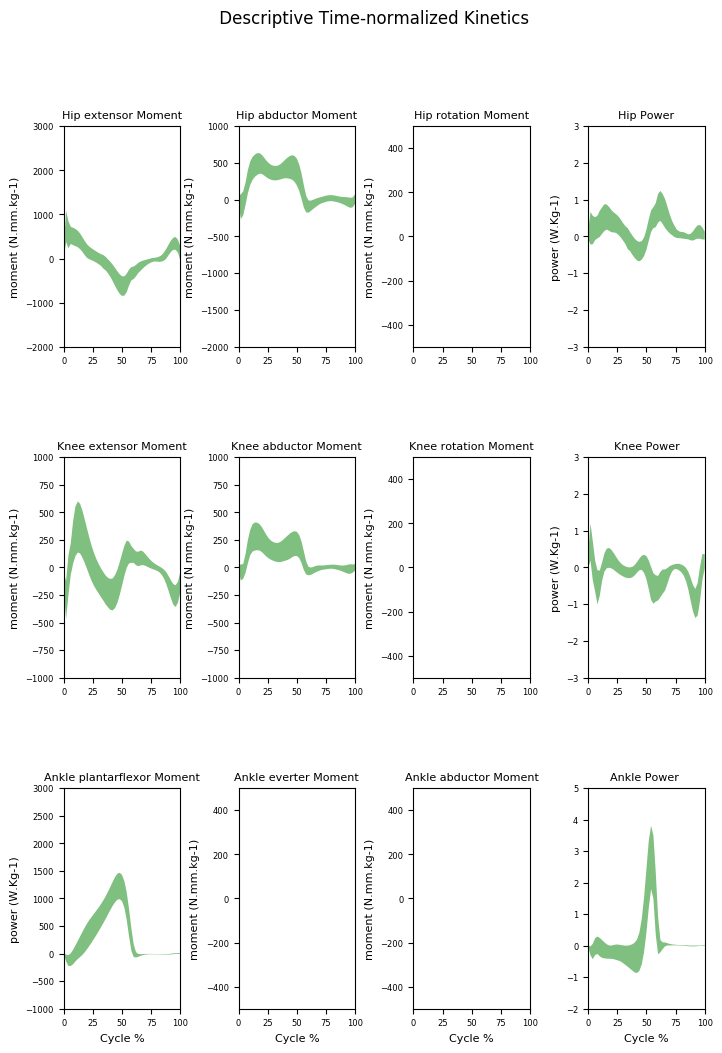

In [11]:
# filter 1 - consistency kinetic panel
#-------------------------------------------
# viewer
kv = plotViewers.LowerLimbKineticsPlotViewer(analysis,pointLabelSuffix=pointSuffix)
kv.setConcretePlotFunction(plot.gaitConsistencyPlot)

kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()